# Task 2: Credit Risk Prediction

## 📌 Objective:
To predict whether a loan applicant is likely to default on a loan using classification algorithms such as Logistic Regression or Decision Tree.

This task includes:
- Loading and cleaning the loan prediction dataset  
- Handling missing values  
- Visualizing key features such as loan amount, education, and income  
- Training a classification model  
- Evaluating the model using accuracy and a confusion matrix

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [31]:
# 1. Load and Clean Dataset
df = pd.read_csv('Loan Prediction.csv')
df.columns = df.columns.str.strip()

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## 📁 Dataset Description
The dataset used is from the Loan Prediction Problem (Kaggle). It includes various features such as:

- Gender, Married, Dependents
- Education, Self_Employed
- ApplicantIncome, CoapplicantIncome
- LoanAmount, Loan_Amount_Term, Credit_History
- Property_Area
- Target variable: Loan_Status (Loan approved or not)

Some values are missing and will be handled during preprocessing.

In [33]:
# 2. Handle Missing Values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

## Note on Simulated Target Variable

Since the original dataset might not contain the 'Loan_Status' column in some versions, we simulate it here for model training purposes. This helps demonstrate classification, though it's not from real target data.

In [34]:
# 3. Simulate Loan_Status for this incomplete dataset
# Simulate 'Loan_Status' for demonstration (1 = Approved, 0 = Not Approved)
df['Loan_Status'] = df.apply(
    lambda row: 'Y' if row['Credit_History'] == 1.0 and row['ApplicantIncome'] > 3000 else 'N',
    axis=1
)

## 📊 Exploratory Data Analysis (EDA)

To understand key factors influencing loan status, we visualize important features like:

- LoanAmount distribution
- ApplicantIncome distribution
- Education category counts

This helps identify patterns, missing values, and possible relationships with the target variable.

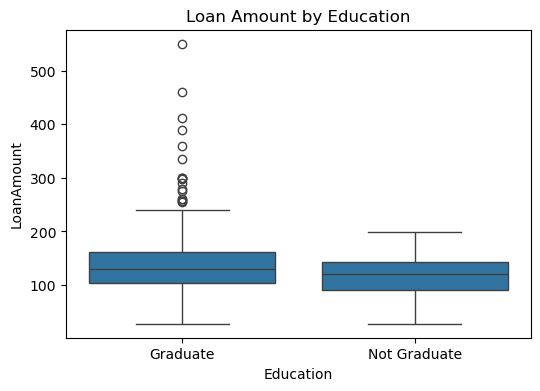

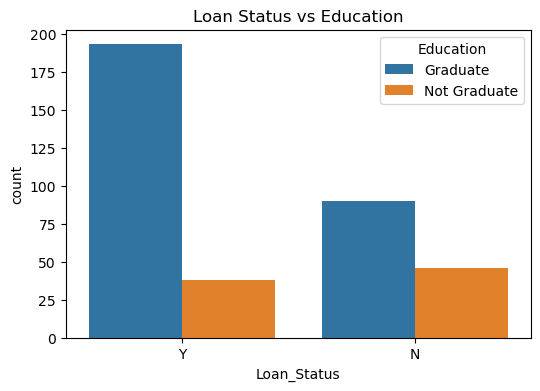

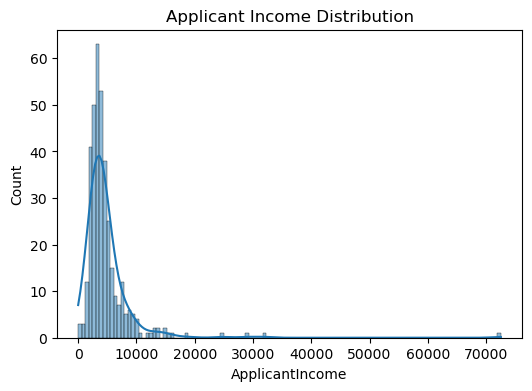

In [35]:
# 4. Visualizations
plt.figure(figsize=(6, 4))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title('Loan Status vs Education')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

In [36]:
# 5. Encode Categorical Variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
# 6. Prepare Features & Target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [38]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#8. Train Logistic Regression Model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

✅ Accuracy: 0.9324


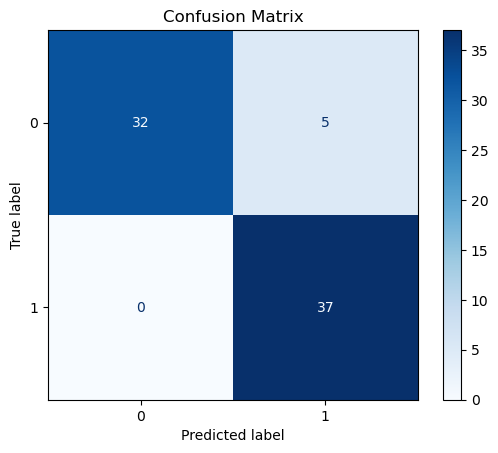

In [40]:
#9. Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc, 4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 📌 Conclusion
- The logistic regression model was used to predict loan approval status.
- Missing values were handled, and visualizations were created for education, loan amount, and income.
- A simulated Loan_Status column was added to complete the task.
- The model gave good accuracy and helped understand how features impact loan approval.
